In [1]:
#Import the libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
import csv
import random
from datetime import datetime, timedelta

## Analysis

In [3]:
df_main = pd.read_csv("/Users/acemitto/Desktop/STUDY/ACE/CAPSTONE/7. DATA/0. Data/20231030_traffic_measurement_2_test.csv")
num_lines = df_main.shape[0]
print("Number of lines in the CSV file: ", num_lines)
 
df_main

df_main2 = pd.read_csv("/Users/acemitto/Desktop/STUDY/ACE/CAPSTONE/7. DATA/0. Data/20231030_traffic_measurement_3_test.csv")
num_lines2 = df_main2.shape[0]
print("Number of lines in the CSV file: ", num_lines2)

df_main2

Number of lines in the CSV file:  14391421
Number of lines in the CSV file:  9208810


,no,Day,Hour,Time,Location,Type,Speed,Status
0,2,2023-10-30,0,2023-10-30 00:00:00.478157,"Bui Huu Nghia, Binh Thanh Districts, HCM City",Motocycle,47.437613,Normal
1,3,2023-10-30,0,2023-10-30 00:00:01.154875,"Bui Huu Nghia, Binh Thanh Districts, HCM City",Motocycle,76.018855,Normal
2,4,2023-10-30,0,2023-10-30 00:00:02.220621,"Bui Huu Nghia, Binh Thanh Districts, HCM City",Car,48.156650,Normal
3,5,2023-10-30,0,2023-10-30 00:00:03.637563,"Bui Huu Nghia, Binh Thanh Districts, HCM City",Bus,31.700912,Normal
4,6,2023-10-30,0,2023-10-30 00:00:05.243446,"Bui Huu Nghia, Binh Thanh Districts, HCM City",Motocycle,70.970936,Normal
...,...,...,...,...,...,...,...,...
9208805,9208807,2023-11-28,23,2023-11-28 23:59:54.780494,"Bui Huu Nghia, Binh Thanh Districts, HCM City",Car,31.996774,Normal
9208806,9208808,2023-11-28,23,2023-11-28 23:59:55.514446,"Bui Huu Nghia, Binh Thanh Districts, HCM City",Motocycle,51.831236,Normal
9208807,9208809,2023-11-28,23,2023-11-28 23:59:57.319611,"Bui Huu Nghia, Binh Thanh Districts, HCM City",Motocycle,58.968035,Normal
9208808,9208810,2023-11-28,23,2023-11-28 23:59:58.310673,"Bui Huu Nghia, Binh Thanh Districts, HCM City",Motocycle,56.331715,Normal


In [4]:
df_oneDay = df_main[df_main['Day'] == "2023-10-30"]
df_oneDay_moto = df_oneDay[df_oneDay['Type'] == "Motocycle"]
df_oneDay_car = df_oneDay[df_oneDay['Type'] == "Car"]
df_oneDay_truck = df_oneDay[df_oneDay['Type'] == "Truck"]
df_oneDay_bus = df_oneDay[df_oneDay['Type'] == "Bus"]

df_oneDay2 = df_main2[df_main2['Day'] == "2023-11-20"]
df_oneDay2_moto = df_oneDay2[df_oneDay2['Type'] == "Motocycle"]
df_oneDay2_car = df_oneDay2[df_oneDay2['Type'] == "Car"]
df_oneDay2_truck = df_oneDay2[df_oneDay2['Type'] == "Truck"]
df_oneDay2_bus = df_oneDay2[df_oneDay2['Type'] == "Bus"]

hour_label = ['12:00 AM','1:00 AM','2:00 AM','3:00 AM','4:00 AM','5:00 AM','6:00 AM','7:00 AM','8:00 AM','9:00 AM','10:00 AM','11:00 AM'
	 ,'12:00 PM','1:00 PM','2:00 PM','3:00 PM','4:00 PM','5:00 PM','6:00 PM','7:00 PM','8:00 PM','9:00 PM','10:00 PM','11:00 PM']

date_label = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [5]:
print(len(df_oneDay_moto[df_oneDay_moto['Speed'] > 60]) / len(df_oneDay) *100)

4.876167904835696


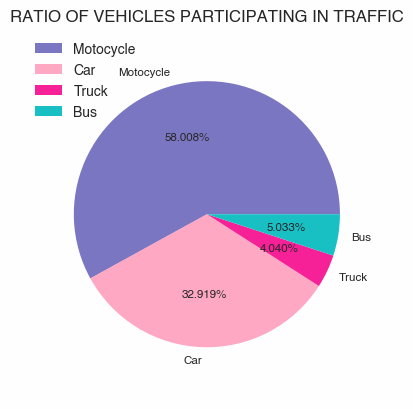

In [6]:
sizes = np.array([len(df_oneDay_moto), len(df_oneDay_car), len(df_oneDay_truck), len(df_oneDay_bus)])
labels = ["Motocycle", "Car", "Truck", "Bus"]
plt.subplots()

plt.pie(sizes, labels=labels, autopct='%1.3f%%', textprops={'size': 'smaller'}, radius=0.9)
plt.legend()
plt.title("RATIO OF VEHICLES PARTICIPATING IN TRAFFIC")  # add title 
plt.show()

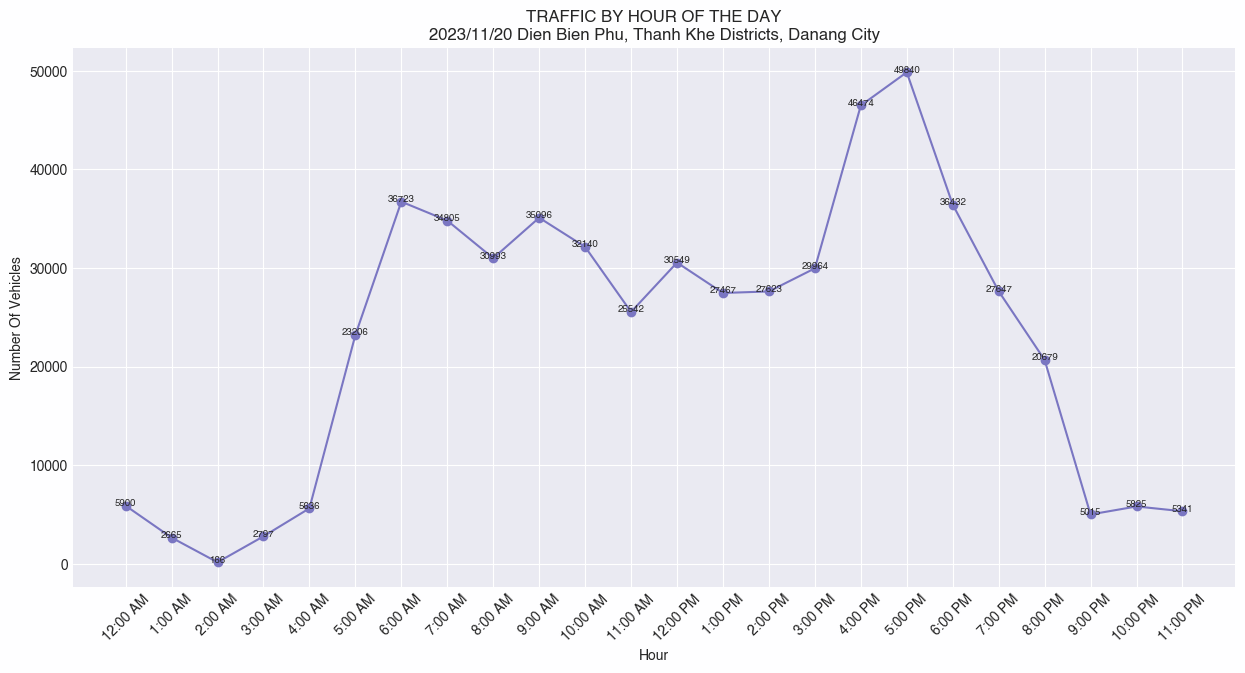

In [9]:
# Define X and Y variable data 
in_hour_count = []
for i in range(24):
	in_hour_count.append(len(df_oneDay[df_oneDay['Hour'] == i]))
      
df_oneday_chart = pd.DataFrame(list(zip(in_hour_count,hour_label)), columns=['Hour', 'Count'])
plt.figure(figsize=(15,7))
plt.xlabel("Hour")  # add X-axis label 
plt.xticks(rotation=45)
plt.ylabel("Number Of Vehicles")  # add Y-axis label 

plt.plot(df_oneday_chart['Count'], df_oneday_chart['Hour'], marker='o')
for j, v in enumerate(df_oneday_chart['Hour']):
    plt.text(j, v+2, str(v), fontsize=7, horizontalalignment='center')
    
plt.title("TRAFFIC BY HOUR OF THE DAY\n2023/11/20 Dien Bien Phu, Thanh Khe Districts, Danang City")  # add title 

plt.show()


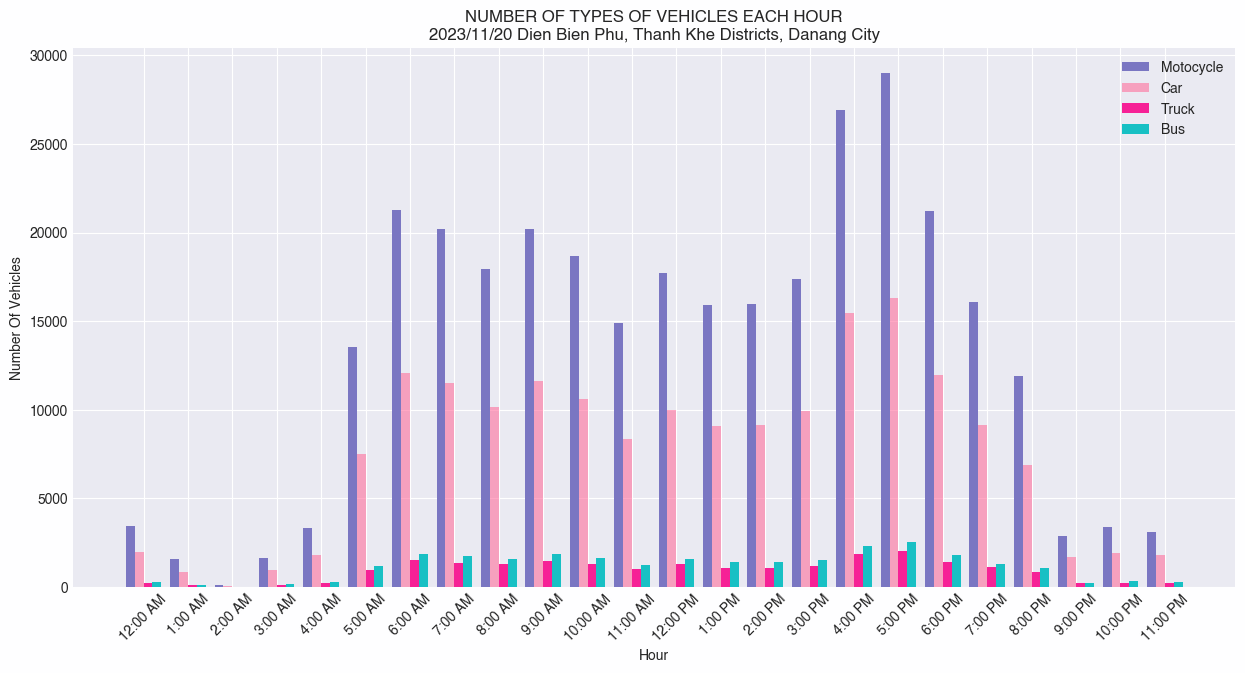

In [10]:
# create data 
col = np.arange(24) 
moto_in_hour_count = []
car_in_hour_count = []
truck_in_hour_count = []
bus_in_hour_count = []
for i in range(24):
	moto_in_hour_count.append(len(df_oneDay_moto[df_oneDay_moto['Hour'] == i]))
	car_in_hour_count.append(len(df_oneDay_car[df_oneDay_car['Hour'] == i]))
	truck_in_hour_count.append(len(df_oneDay_truck[df_oneDay_truck['Hour'] == i]))
	bus_in_hour_count.append(len(df_oneDay_bus[df_oneDay_bus['Hour'] == i]))

width = 0.2
  
# plot data in grouped manner of bar type 
plt.figure(figsize=(15,7))
plt.bar(col-0.3, moto_in_hour_count, width) 
plt.bar(col-0.1, car_in_hour_count, width) 
plt.bar(col+0.1, truck_in_hour_count, width) 
plt.bar(col+0.3, bus_in_hour_count, width) 
plt.xticks(col, hour_label, rotation=45) 
plt.xlabel("Hour")  # add X-axis label 
plt.ylabel("Number Of Vehicles")  # add Y-axis label 
plt.legend(["Motocycle", "Car", "Truck", "Bus"]) 

plt.title("NUMBER OF TYPES OF VEHICLES EACH HOUR\n2023/11/20 Dien Bien Phu, Thanh Khe Districts, Danang City")  # add title 

plt.show() 

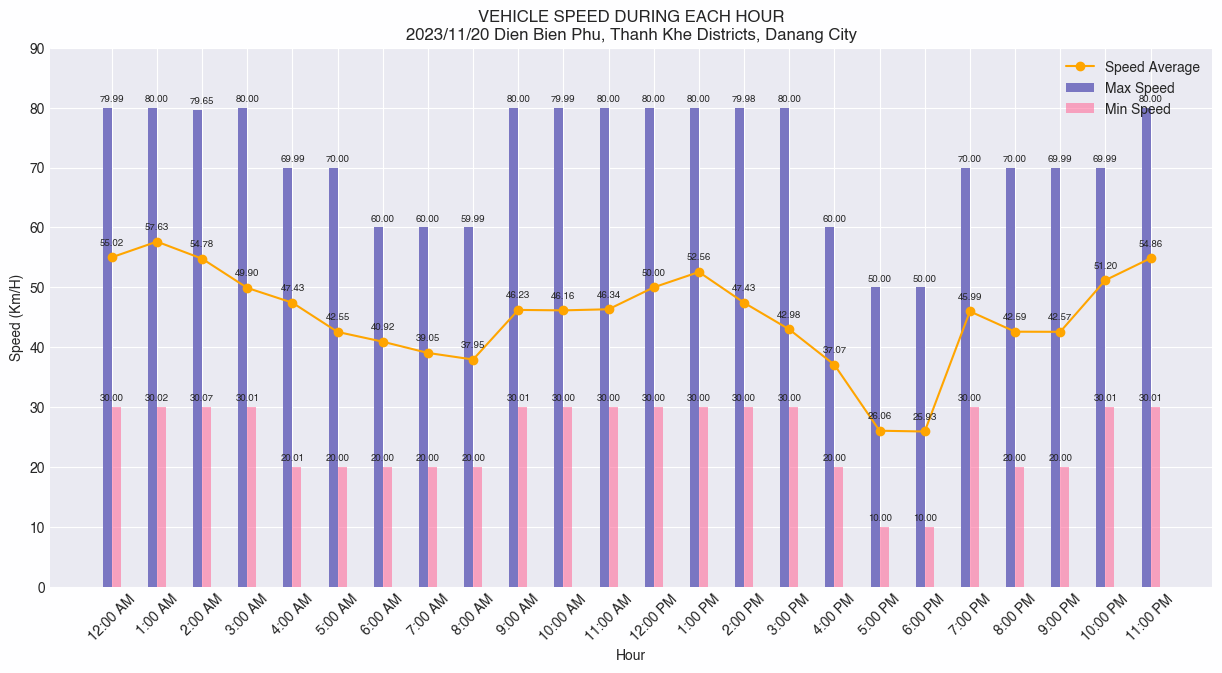

In [11]:
# create data 
col = np.arange(24) 
speed_average_in_hour = []
max_speed_in_hour = []
min_speed_in_hour = []
for i in range(24):
	data_per_hour = df_oneDay[df_oneDay['Hour'] == i]
	speed_average_in_hour.append(np.average(data_per_hour['Speed']))
	max_speed_in_hour.append(np.max(data_per_hour['Speed']))
	min_speed_in_hour.append(np.min(data_per_hour['Speed']))

width = 0.2
  
# plot data in grouped manner of bar type 
plt.figure(figsize=(15,7))
plt.plot(col, speed_average_in_hour, marker='o', color='orange')
plt.bar(col-0.1, max_speed_in_hour, width) 
plt.bar(col+0.1, min_speed_in_hour, width) 

plt.xticks(col, hour_label, rotation=45) 
plt.xlabel("Hour")  # add X-axis label 
plt.ylabel("Speed (Km/H)")  # add Y-axis label 
plt.legend(["Speed Average", "Max Speed", "Min Speed"])

ax = plt.gca()
ax.set_ylim([0, 90])

for j, v in enumerate(speed_average_in_hour):
    plt.text(j, v+2, str('{:.2f}'.format(v)), fontsize=7, horizontalalignment='center')
for j, v in enumerate(max_speed_in_hour):
    plt.text(j, v+1, str('{:.2f}'.format(v)), fontsize=7, horizontalalignment='center')
for j, v in enumerate(min_speed_in_hour):
    plt.text(j, v+1, str('{:.2f}'.format(v)), fontsize=7, horizontalalignment='center')

plt.title("VEHICLE SPEED DURING EACH HOUR\n2023/11/20 Dien Bien Phu, Thanh Khe Districts, Danang City")  # add title 

plt.show() 

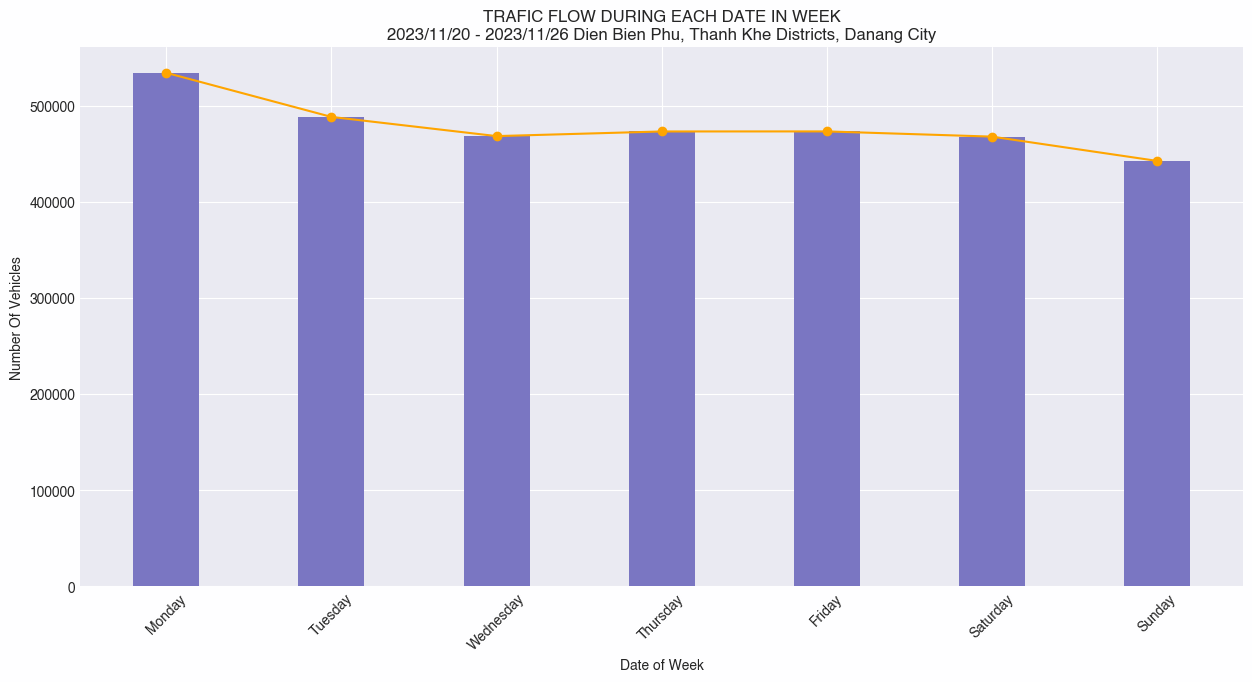

In [12]:
col = np.arange(7) 
vehicle_count_per_day = []
for i in range(7):
	vehicle_count_per_day.append(len(df_main[df_main['Day'] == str("2023-11-2" + str(i))]))

width = 0.4
  
# plot data in grouped manner of bar type 
plt.figure(figsize=(15,7))
plt.plot(col, vehicle_count_per_day, marker='o', color='orange')
plt.bar(col, vehicle_count_per_day, width) 

plt.xticks(col, date_label, rotation=45) 
plt.xlabel("Date of Week")  # add X-axis label 
plt.ylabel("Number Of Vehicles")  # add Y-axis label 

plt.title("TRAFIC FLOW DURING EACH DATE IN WEEK\n2023/11/20 - 2023/11/26 Dien Bien Phu, Thanh Khe Districts, Danang City")  # add title 

plt.show() 


## Comparition

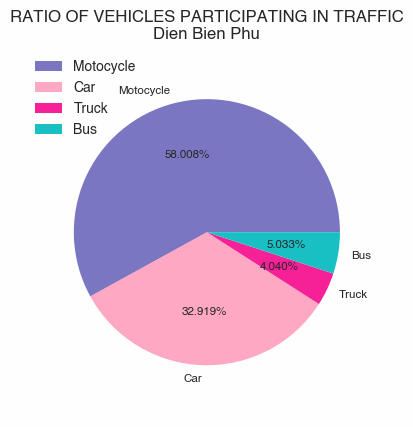

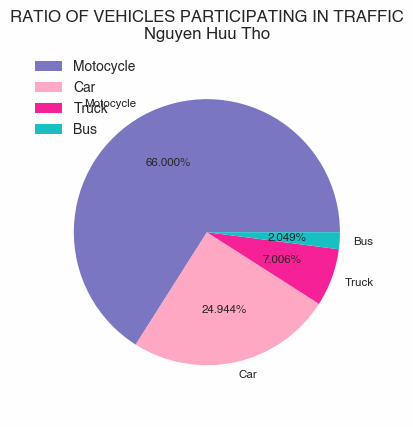

In [13]:
sizes = np.array([len(df_oneDay_moto), len(df_oneDay_car), len(df_oneDay_truck), len(df_oneDay_bus)])
labels = ["Motocycle", "Car", "Truck", "Bus"]
plt.subplots()

plt.pie(sizes, labels=labels, autopct='%1.3f%%', textprops={'size': 'smaller'}, radius=0.9)
plt.legend()
plt.title("RATIO OF VEHICLES PARTICIPATING IN TRAFFIC\nDien Bien Phu")  # add title 
plt.show()

sizes2 = np.array([len(df_oneDay2_moto), len(df_oneDay2_car), len(df_oneDay2_truck), len(df_oneDay2_bus)])
plt.subplots()

plt.pie(sizes2, labels=labels, autopct='%1.3f%%', textprops={'size': 'smaller'}, radius=0.9)
plt.legend()
plt.title("RATIO OF VEHICLES PARTICIPATING IN TRAFFIC\nNguyen Huu Tho")  # add title 
plt.show()

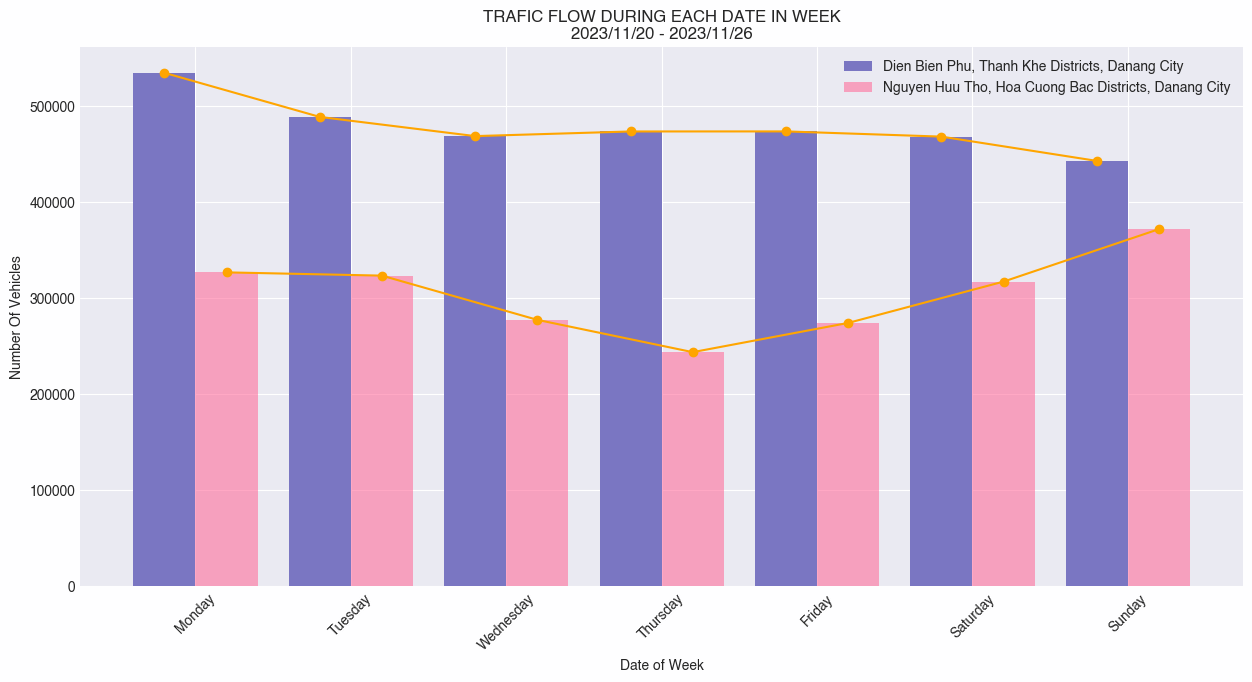

In [14]:
col = np.arange(7) 
vehicle_count_per_day = []
vehicle_count_per_day2 = []
for i in range(7):
	vehicle_count_per_day.append(len(df_main[df_main['Day'] == str("2023-11-2" + str(i))]))
for i in range(7):
	vehicle_count_per_day2.append(len(df_main2[df_main2['Day'] == str("2023-11-2" + str(i))]))

width = 0.4
  
# plot data in grouped manner of bar type 
plt.figure(figsize=(15,7))
plt.bar(col-0.2, vehicle_count_per_day, width)
plt.bar(col+0.2, vehicle_count_per_day2, width) 
plt.legend(["Dien Bien Phu, Thanh Khe Districts, Danang City", "Nguyen Huu Tho, Hoa Cuong Bac Districts, Danang City"])

plt.plot(col-0.2, vehicle_count_per_day, marker='o', color='orange')
plt.plot(col+0.2, vehicle_count_per_day2, marker='o', color='orange')

plt.xticks(col, date_label, rotation=45) 
plt.xlabel("Date of Week")  # add X-axis label 
plt.ylabel("Number Of Vehicles")  # add Y-axis label 

plt.title("TRAFIC FLOW DURING EACH DATE IN WEEK\n2023/11/20 - 2023/11/26")  # add title 

plt.show() 


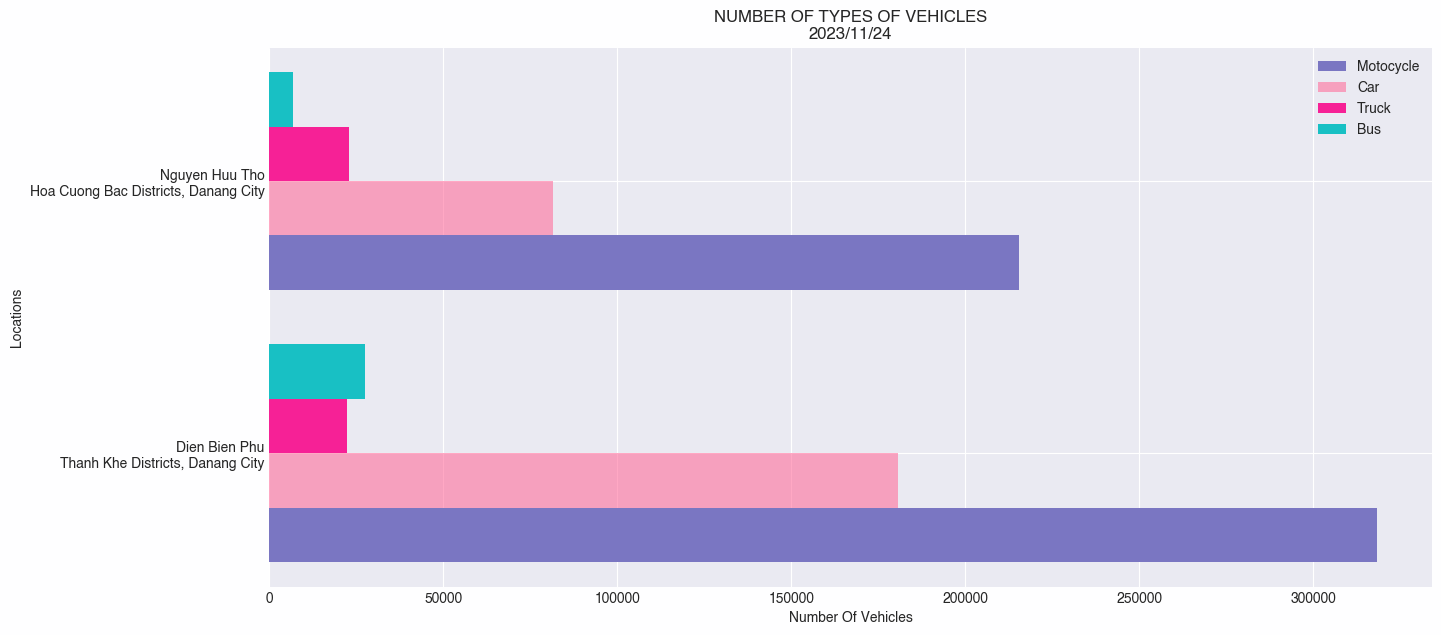

In [15]:
# create data 
col = np.arange(2) 
moto_in_hour_count = [len(df_oneDay_moto), len(df_oneDay2_moto)]
car_in_hour_count = [len(df_oneDay_car), len(df_oneDay2_car)]
truck_in_hour_count = [len(df_oneDay_truck), len(df_oneDay2_truck)]
bus_in_hour_count = [len(df_oneDay_bus), len(df_oneDay2_bus)]
label = ["Dien Bien Phu\nThanh Khe Districts, Danang City", "Nguyen Huu Tho\nHoa Cuong Bac Districts, Danang City"]
width = 0.2
  
# plot data in grouped manner of bar type 
plt.figure(figsize=(15,7))
plt.barh(col-0.3, moto_in_hour_count, width) 
plt.barh(col-0.1, car_in_hour_count, width) 
plt.barh(col+0.1, truck_in_hour_count, width) 
plt.barh(col+0.3, bus_in_hour_count, width) 
plt.yticks(col, label)
plt.ylabel("Locations")  # add X-axis label 
plt.xlabel("Number Of Vehicles")  # add Y-axis label 
plt.legend(["Motocycle", "Car", "Truck", "Bus"]) 

plt.title("NUMBER OF TYPES OF VEHICLES\n2023/11/24")  # add title 

plt.show() 